<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/beauty_good%EC%88%98%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy wordcloud

In [ ]:
import nltk
from konlpy.corpus import kobill

In [ ]:
from konlpy.tag import Twitter
from collections import Counter

In [ ]:
import pandas as pd
total_data = pd.read_excel('./beauty_scraping.xlsx')
grade_4 = total_data['star grade'] >= 4.0

df_grade4 = total_data[grade_4]
df_grade4['star grade'].value_counts()

df_grade4.head(10)

,star grade,review
0,4.0,지금 두 번째 펀딩 했는데 주름이 눈에 띄게 없어졌다라기 보다 아주 조금 옅어진것 ...
1,4.0,내부사정을 자세히 알지는 못하겠고\n좋은 소식은 아닌지라\n조심스럽고 제품 신뢰도가...
2,5.0,"아침저녁 세안후 첫세럼으로 사용중입니다\n피부에 큰 트러블이 있진 않지만, 속건조?..."
3,5.0,직원분들도 너무 친절하고 좋으셨구 제품도 정말 좋습니다. 저는 문의도 많았고 직원분...
4,5.0,1차 펀딩에 이어 3차 펀딩까지 참여했는데\n사용방법에 대해 제대로 알고 사용하니 ...
5,5.0,펀딩 번호 : 6291065\n아직 케이스 리뉴얼 된건 안 왔지만 잘 사용하고 있어...
8,4.0,"제풒이야 소문이 나서 더 이상의 말이 필요 없지만,\n직원들 해고의 문제가 있는 것..."
9,4.5,현재 두번째 바틀 사용중인데 효과는 그닥..? 그래도 안쓰는거보다는 훨 나을듯하여 ...
10,5.0,저번 펀딩에도 참여해서 제품 만족도가 좋아\n또 참여하게되었습니다.\n피부가 쫀쫀해...
11,4.5,예전에는 피부가 괜찮았는데\n한번 뒤집어진 이후로 수부지는 악화되고 뭔가 속 건조와...


In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8005 entries, 0 to 8004
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   star grade  8005 non-null   float64
 1   review      8005 non-null   object 
dtypes: float64(1), object(1)
memory usage: 125.2+ KB


In [ ]:
len(total_data)

8005

In [ ]:
x_data = total_data['review']
y_data = total_data['star grade']

In [ ]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [ ]:
y_data = y_data.apply(lambda val:make_y_data(val))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6003,), (6003,), (2002,), (2002,))

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  50640      0 --:--:-- --:--:-- --:--:-- 50640


In [ ]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

6623                                아침 저녁으로 썼더니 얼굴이 환해졌어요
3452         펀딩하길 정말 잘한듯요제 피부에 아주 찰떡에요촉촉하고 보습도 잘되서 너무 좋아요
727              피부 예민한 친구에게 선물했어요좋은 제품 발견했다고 칭찬받아서 뿌듯합니다
466                                            잘쓰고 있답니다ㅎㅎ
720                                          좋아요좋아요좋아요좋아요
                              ...                        
703     남자라서 여태껏 올인원말고 써본적 없다가 우연히 와디즈를 통해 알게 되어 이번에 처...
5692                      가볍게 바르기 좋아요 다만 번들거리는 느낌은 조금 있어요
6353    오오 뭔가피부가 환해지는것을두번 사용으로 느꼈습니다전혀 자극적이지않고향도 없고 ㅠㅠ...
6033    잘 받았어요 가장 건조한 계절이 끝나갈 때 받아서 아쉽긴 하지만 이제라도 다시 살 ...
7867                               저도 개 신청했는데 하나만 배송이 왔어요
Name: review, Length: 6003, dtype: object

In [ ]:
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()

In [ ]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
import pickle

In [ ]:
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [ ]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['아침', '저녁', '썼', '더니', '얼굴', '환해졌', '어요'],
 ['펀딩',
  '길',
  '정말',
  '듯',
  '요',
  '!',
  '제',
  '피부',
  '아주',
  '찰떡',
  '요',
  '!',
  '촉촉',
  '고',
  '보습',
  '도',
  '서',
  '너무',
  '아요',
  '~'],
 ['피부',
  '예민',
  '친구',
  '에게',
  '선물',
  '했',
  '어요',
  '제품',
  '발견',
  '했',
  '다고',
  '칭찬',
  '아서',
  '뿌듯',
  '합니다'],
 ['쓰', '고', '답니다', 'ㅎㅎ'],
 ['아요', '아요', '아요', '아요'],
 ['제품', '인', '거', '은데', '저', '한텐', '맞', 'ㅇㅏ', '속상하', '네요'],
 ['수분', '크림', '만족', '합니다'],
 ['수분', '감', '아요', '.', '건조', '할', '거', '아요'],
 ['제',
  '입술',
  '건조',
  '아주',
  '심한',
  '편',
  '인데',
  '기존',
  '썼',
  '던',
  '림',
  '밥',
  '보다',
  '효과',
  '네요',
  '^^'],
 ['아직',
  '써',
  '봐야겠지만',
  '일단',
  '발림',
  '성',
  '습니다',
  '주름',
  '아무래도',
  '나이',
  '50',
  '대',
  '다',
  '니',
  '지켜봐야',
  '겠',
  '지만',
  '피부',
  '안색',
  '밝',
  '아',
  '진',
  '습니다',
  '조금',
  '기대',
  '면서',
  '사용',
  '해',
  '겠',
  '습니다'],
 ['제형',
  '딱딱',
  '해서',
  '이거',
  '바르',
  '면',
  '스며들',
  '까',
  '?',
  '었',
  '는데',
  '웬',
  '걸',
  '마르',
  '니깐',
  '싹',
  '쓰',
  '며'

In [ ]:
import tensorflow as tf

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
tokenizer.word_index


{'.': 1,
 '고': 2,
 '도': 3,
 '을': 4,
 '!': 5,
 '게': 6,
 '어요': 7,
 '는데': 8,
 '피부': 9,
 '사용': 10,
 ',': 11,
 '했': 12,
 '습니다': 13,
 '네요': 14,
 '제품': 15,
 '아요': 16,
 '해': 17,
 '펀딩': 18,
 '면': 19,
 '너무': 20,
 '쓰': 21,
 '어': 22,
 '다': 23,
 '었': 24,
 '아': 25,
 '로': 26,
 '거': 27,
 '만': 28,
 '느낌': 29,
 '겠': 30,
 '기': 31,
 '았': 32,
 '바르': 33,
 '지만': 34,
 '저': 35,
 '~': 36,
 '라': 37,
 '해서': 38,
 '효과': 39,
 '니': 40,
 '써': 41,
 '합니다': 42,
 '촉촉': 43,
 '할': 44,
 '만족': 45,
 '어서': 46,
 '정말': 47,
 '입니다': 48,
 '제': 49,
 '?': 50,
 '모공': 51,
 '많이': 52,
 '아서': 53,
 '구매': 54,
 '던': 55,
 '얼굴': 56,
 '서': 57,
 '향': 58,
 '요': 59,
 '까지': 60,
 '..': 61,
 '플': 62,
 '앰': 63,
 '면서': 64,
 '봤': 65,
 '에서': 66,
 '인': 67,
 '후': 68,
 '진짜': 69,
 '건조': 70,
 'ㅎㅎ': 71,
 ')': 72,
 '화장품': 73,
 '보다': 74,
 '해요': 75,
 '처음': 76,
 '시': 77,
 '1': 78,
 '세': 79,
 '당고': 80,
 '인데': 81,
 '에요': 82,
 ':': 83,
 '더라구요': 84,
 '세안': 85,
 '2': 86,
 '마스크': 87,
 '흡수': 88,
 '기대': 89,
 '꾸준히': 90,
 '크림': 91,
 '트러블': 92,
 '화장': 93,
 '성': 94,
 '건': 95,
 

In [ ]:
words=tokenizer.word_counts

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords



In [ ]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)



In [ ]:
wordcloud = WordCloud(
font_path = './NanumGothicExtraBold.ttf', background_color='white',
colormap = "hot", width=3000, height=2000).generate_from_frequencies(words) 




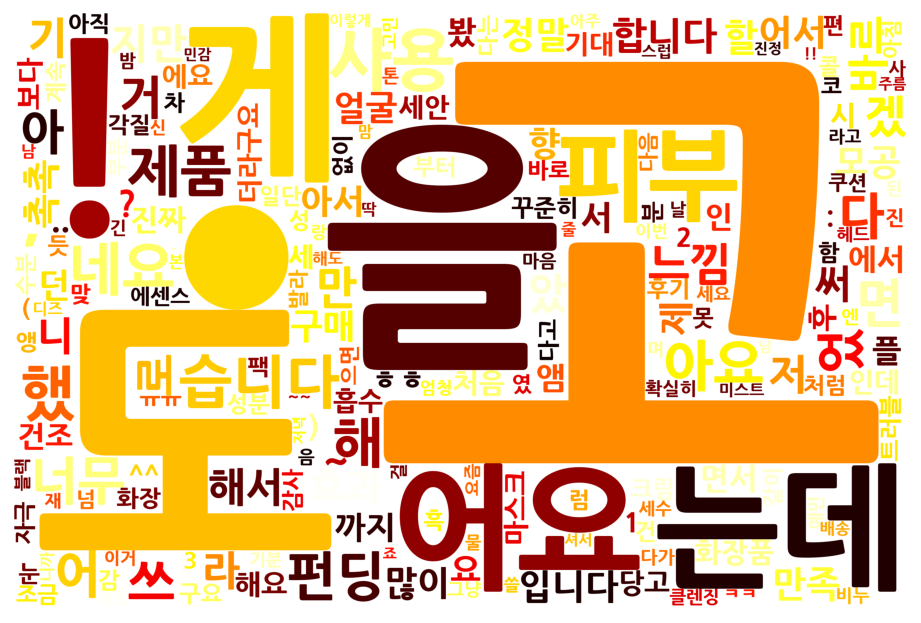

In [ ]:
plt.imshow(wordcloud) 

figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()

